# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [1]:
# Libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




#sns.set_style('white')
#plt.rcParams['font.family'] = 'monospace'

#blues = ['#193f6e','#3b6ba5','#72a5d3','#b1d3e3','#e1ebec']
#reds = ['#e61010','#e65010','#e68d10','#e6df10','#c2e610']
#cmap_blues = sns.color_palette(blues)
#cmap_reds = sns.color_palette(reds)
#sns.set_palette(cmap_blues)

#print('These are color palette I will use in it:')
#sns.palplot(cmap_blues)
#sns.palplot(cmap_reds)

In [2]:
# Get data
dados = pd.read_csv('hospital_readmissions.csv')
dados_original = dados.copy()
amostra = len(dados)
dados.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
#Lets take a look into de data
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [4]:
dados.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

Apparently we have all the columns complete, but are they properly filled in? let's investigate

In [5]:
# Show us all values in each column
for i in dados.columns:
    print('columns :', i, 'values: ' , np.sort(dados[i].unique()), '\n')

columns : age values:  ['[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)' '[90-100)'] 

columns : time_in_hospital values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

columns : n_lab_procedures values:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 108 109 111
 113] 

columns : n_procedures values:  [0 1 2 3 4 5 6] 

columns : n_medications values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 68 69 72 75 79] 

columns : n_outpatient values:  [ 0  1  2  3  4  

We observe that only the columns medical_specialty, diag_1, diag_2 and diag_3 have values referring to Missing and Others.



1- Remoção de dados nulas
2- Tratamento de outliers
3- Análise de correlação
4- encoding de variáveis categóricas
5- Normalização das variáveis
6- Balanceamento na variável alvo
7- Criação do modelo de classificação
8- Avaliação do modelo

# Let's look at each variable individually

In [6]:
# Lets tranform each age group un an integer so we can apply more analises.

dic = {'[40-50)' : 0 ,
        '[50-60)' : 1,
        '[60-70)' : 2,
        '[70-80)' : 3,
        '[80-90)' : 4,
        '[90-100)': 5,

# Lets using change readmitted values as well, no to 0 and yes to 1

        'no' : 0 ,
        'yes' : 1}
dados = dados.replace(dic)

## Readmitted

<Axes: xlabel='readmitted', ylabel='Count'>

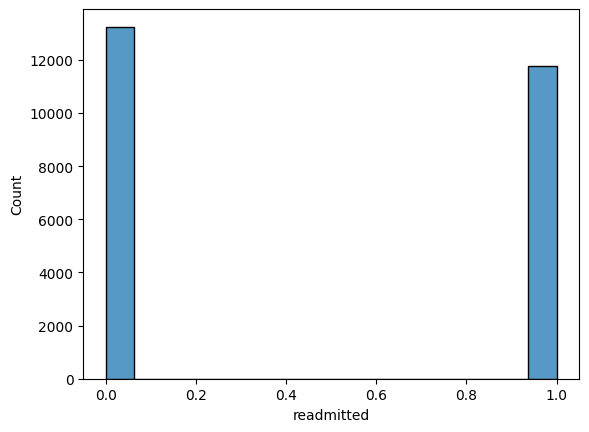

In [7]:
sns.histplot(data = dados, x = 'readmitted')

In [8]:
admitted_yes = len(dados[dados.readmitted == 1])
admitted_no = len(dados[dados.readmitted == 0])

print('We have {} total records, {}({}% of total) pacients had readmission and {} ({}% of total)stayed at home'.format(amostra,admitted_yes,round(admitted_yes/amostra,3)*100 ,admitted_no, round(admitted_no/amostra,3)*100  ))


We have 25000 total records, 11754(47.0% of total) pacients had readmission and 13246 (53.0% of total)stayed at home


Well, we have a good distribution of patients, let's now proceed to the individual analysis of each feature of our data

C:\Users\andre\AppData\Local\Temp\ipykernel_35768\1419708820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(),


<Axes: >

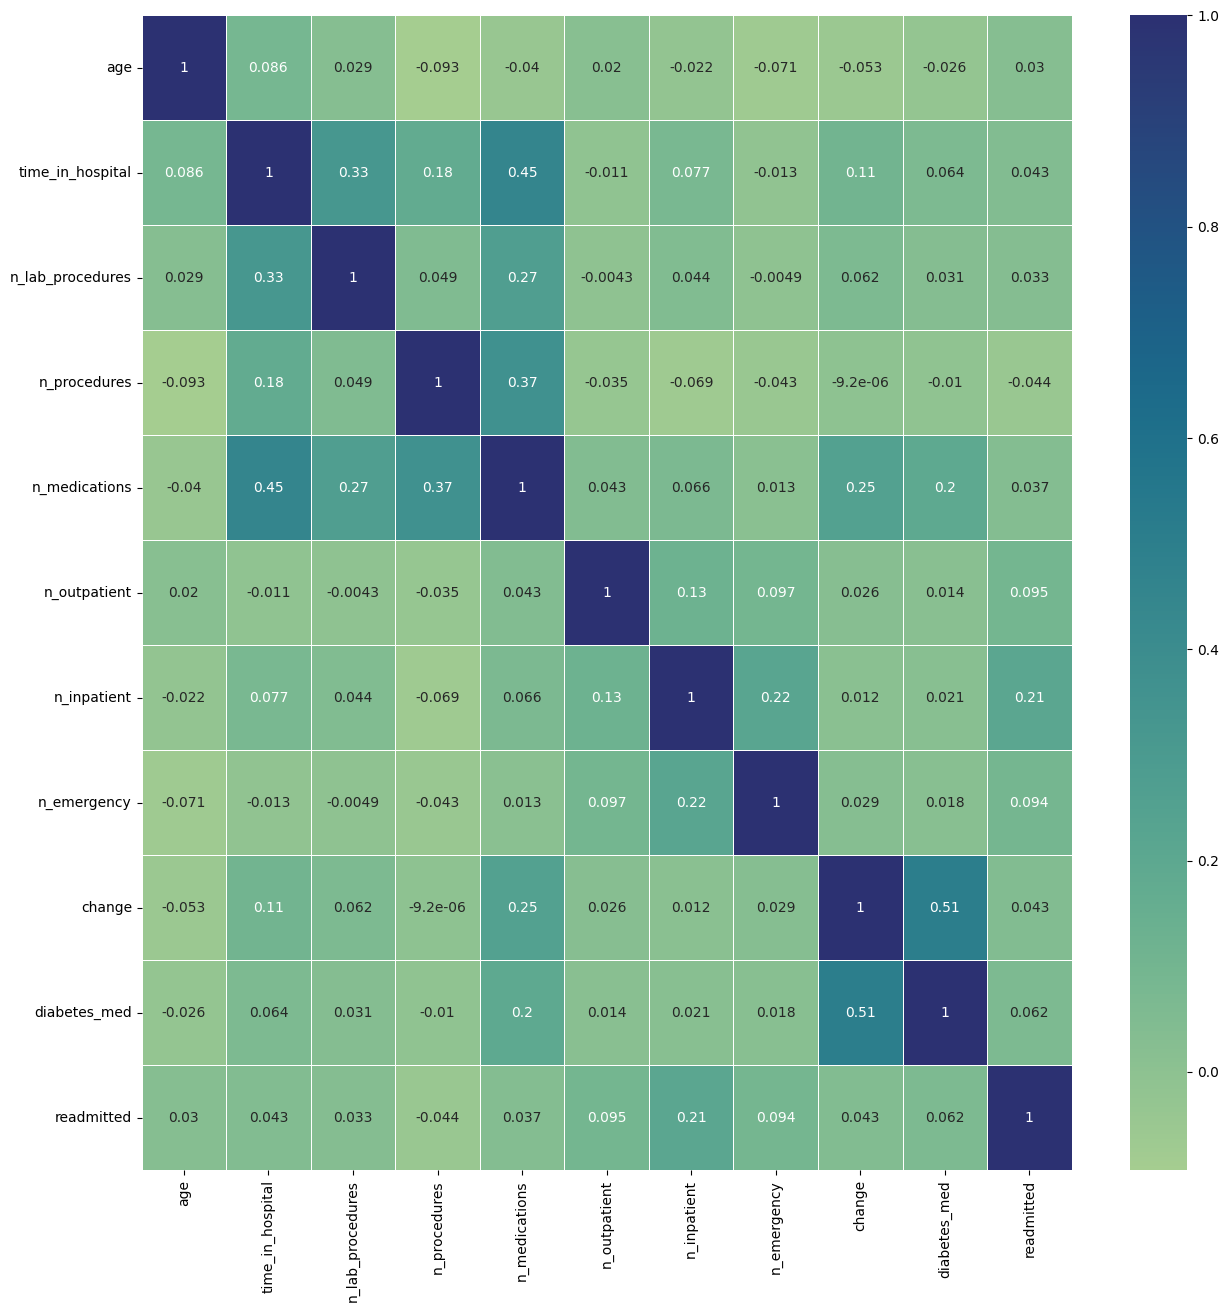

In [9]:
fig, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(dados.corr(),
            annot= True,
            linewidths= 0.5,
            cmap = 'crest',
            )

Regarding the variable that matters "readmitted" the only weak linear correlation we observed is with "n_inpatient", the rest apparently does not impact.

Regarding the other variables, we have some correlations that permeate common sense, such as the relationship between "change" and "diabetes_med" and "time_in_hospital" / "n_lab_procedures" / "n_procedures" / "n_procedures" which tells us that the greater the time in the hospital, the greater the amount of tests and procedures that the patient will undergo.

## Age

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

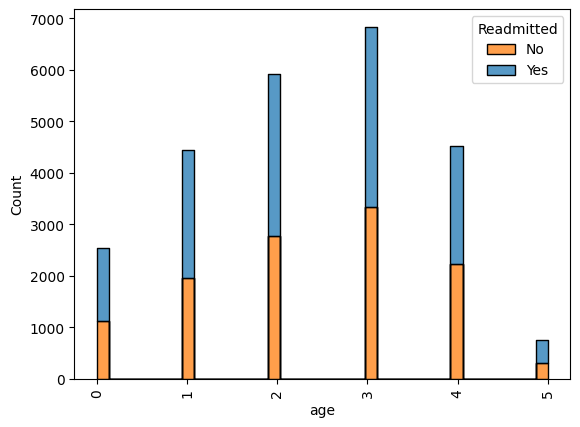

In [10]:
#dando uma olhada na distribuição das idades
sns.histplot(data = dados, x = 'age', hue = 'readmitted', element="step", multiple="stack")
plt.legend(title='Readmitted', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=90)


In [11]:
age = dados.groupby('age')['readmitted'].agg(['sum', 'count'])
age['participation_%'] = round(age['sum'] / age['count'],4)*100
age['representacao_%'] = round(age['count'] / amostra,4)*100
age

,sum,count,participation_%,representacao_%
age,,,,
0,1127,2532,44.51,10.13
1,1966,4452,44.16,17.81
2,2770,5913,46.85,23.65
3,3336,6837,48.79,27.35
4,2239,4516,49.58,18.06
5,316,750,42.13,3.00


The younger groups have lower chances of readmission, although the older group has the lowest percentage, its participation in the total patient population is very small.

## Time in hospital

<Axes: xlabel='time_in_hospital', ylabel='Count'>

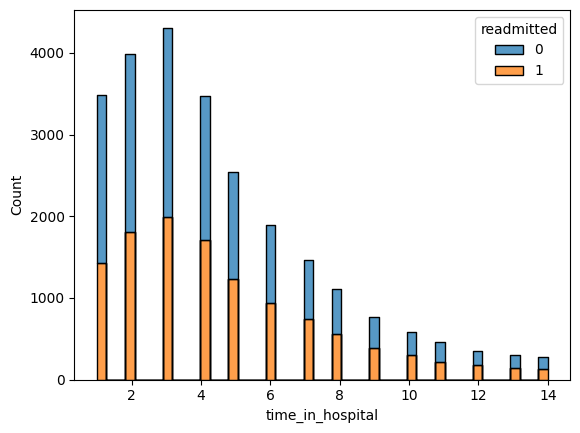

In [13]:
sns.histplot(data = dados, x = 'time_in_hospital', hue = 'readmitted', element="step", multiple="stack")

In [14]:
time_in_hospital = dados.groupby(dados.time_in_hospital // 1)['readmitted'].agg(['sum', 'count'])
time_in_hospital['participation_%'] = round(time_in_hospital['sum'] / time_in_hospital['count'],4)*100
time_in_hospital['representacao_%'] = round(time_in_hospital['count'] / amostra,4)*100
time_in_hospital

,sum,count,participation_%,representacao_%
time_in_hospital,,,,
1,1426,3480,40.98,13.92
2,1806,3986,45.31,15.94
3,1989,4311,46.14,17.24
4,1713,3467,49.41,13.87
5,1228,2542,48.31,10.17
6,933,1895,49.23,7.58
7,746,1467,50.85,5.87
8,555,1104,50.27,4.42
9,391,768,50.91,3.07


In [15]:
time_in_hospital['representacao_%'][0:3].sum()

47.099999999999994

People who spend less time in the hospital are less likely to return to it, especially if they stay for up to 3 days, this grupos represents  ~47% of pacients

## Number of Labs procedures

<Axes: xlabel='n_lab_procedures', ylabel='Count'>

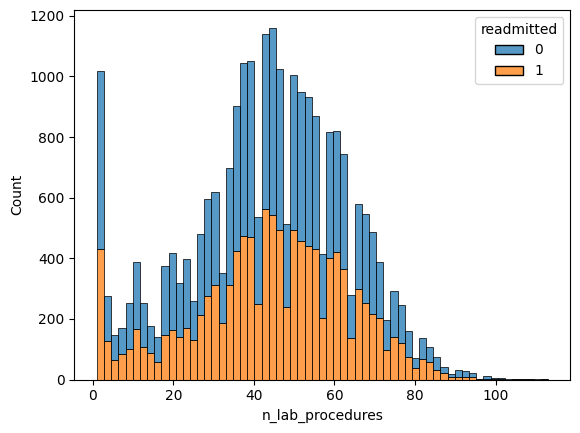

In [16]:
sns.histplot(data = dados, x = 'n_lab_procedures', hue = 'readmitted', multiple = 'stack')

In [53]:
n_lab_procedures = dados.groupby(dados.n_lab_procedures // 10)['readmitted'].agg(['sum', 'count'])
n_lab_procedures['participation_%'] = round(n_lab_procedures['sum'] / n_lab_procedures['count'],4)*100
n_lab_procedures['representacao_%'] = round(n_lab_procedures['count'] / amostra,4)*100
n_lab_procedures

#nada significativo

,sum,count,participation_%,representacao_%
n_lab_procedures,,,,
0,893,1862,47.96,7.45
1,712,1576,45.18,6.30
2,1055,2227,47.37,8.91
3,1949,4155,46.91,16.62
4,2504,5407,46.31,21.63
5,2102,4463,47.10,17.85
6,1567,3246,48.27,12.98
7,704,1493,47.15,5.97
8,213,451,47.23,1.80


Explaining: As the number of exams performed is very large, we chose to group them 10 by 10, that is, group 0 represents 1 to 10, 1 represents 11 to 20... and so on. We can observe that the only numbers that call our attention are those of the last groups, but they represent 28 patients out of a universe of 25 thousand.

## Number of medical procedures

<Axes: xlabel='n_procedures', ylabel='Count'>

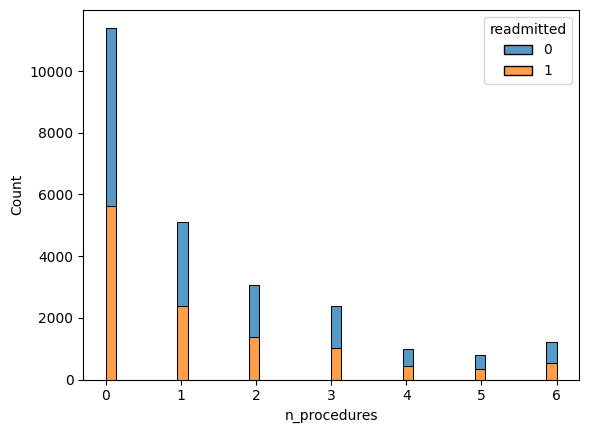

In [54]:
sns.histplot(data = dados, x = 'n_procedures', hue = 'readmitted', multiple = 'stack')

In [55]:
n_procedures = dados.groupby('n_procedures')['readmitted'].agg(['sum', 'count'])
n_procedures['participation_%'] = round(n_procedures['sum'] / n_procedures['count'],4)*100
n_procedures['representacao_%'] = round(n_procedures['count'] / amostra,4)*100
n_procedures

#nada significativo

,sum,count,participation_%,representacao_%
n_procedures,,,,
0,5625,11409,49.30,45.64
1,2395,5098,46.98,20.39
2,1382,3064,45.10,12.26
3,1023,2395,42.71,9.58
4,453,999,45.35,4.00
5,352,808,43.56,3.23
6,524,1227,42.71,4.91


<Axes: xlabel='n_procedures', ylabel='participation_%'>

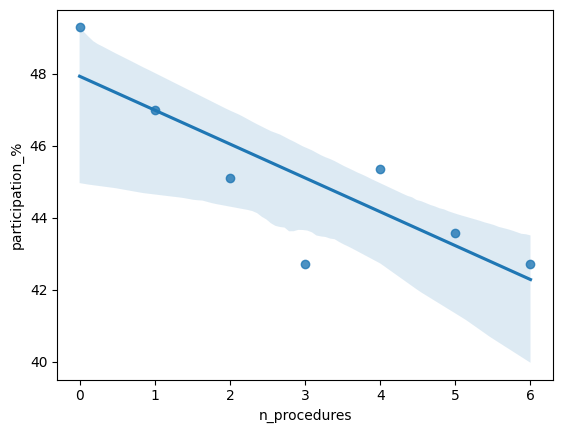

In [56]:
sns.regplot(data = n_procedures, x = n_procedures.index, y = n_procedures['participation_%'])

Curious pattern we observe here, the greater the amount of medical procedures that the patient goes through, the lower the chance of being readmitted

## Quantity of medications

<Axes: xlabel='n_medications', ylabel='Count'>

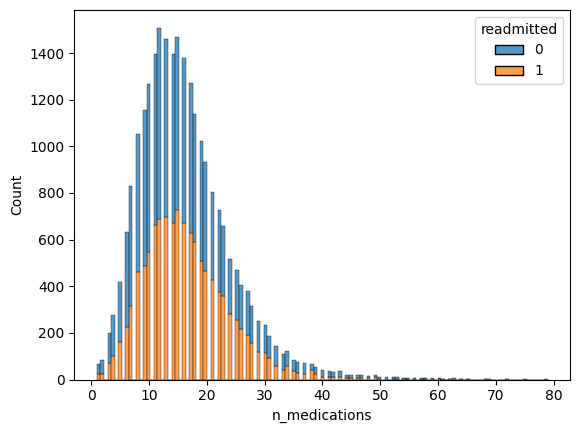

In [58]:
sns.histplot(data = dados, x = 'n_medications', hue = 'readmitted', multiple = 'stack')

In [62]:
n_medications = dados.groupby(dados.n_medications // 12)['readmitted'].agg(['sum', 'count'])
n_medications['participation_%'] = round(n_medications['sum'] / n_medications['count'],4)*100
n_medications['representacao_%'] = round(n_medications['count'] / amostra,4)*100
n_medications.head(30) #ajustar index

#podemos observar que os indivídos que tomam até 12 medicamentos representam 1/3 da nossa amostra e possum um retorno bem inferior ao esperado
#nada significativo

,sum,count,participation_%,representacao_%
n_medications,,,,
0,3082,7373,41.80,29.49
1,6813,13768,49.48,55.07
2,1623,3222,50.37,12.89
3,192,488,39.34,1.95
4,31,121,25.62,0.48
5,12,25,48.00,0.10
6,1,3,33.33,0.01


In this case, we decided to organize the amount of medications taken in groups of 12. Group 0 groups patients who took 0 medicines up to 11, group 1 from 12 to 23 medications.

We can observe that the individuals who take up to 12 medications represent 1/3 of our sample and have a return rate much lower than mean

Groups 1 and 2 have an above average readmission average and what indicates us a pattern here. Let's disregard the other groups because they represent very small samples of the population

## Medical Specialty

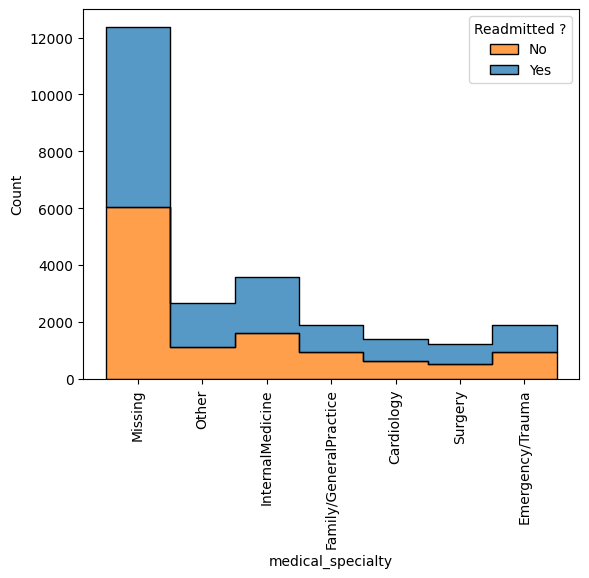

In [64]:
sns.histplot(data = dados, x = 'medical_specialty', hue = 'readmitted', element = "step", multiple = 'stack')
plt.xticks(rotation=90)
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])

In [78]:
temp = dados.groupby('medical_specialty')['readmitted'].sum()
medical_specialty = pd.DataFrame(temp)
medical_specialty['count'] = dados.groupby('medical_specialty')['readmitted'].count()

medical_specialty['participation_%'] = round(medical_specialty['readmitted'] / medical_specialty['count'],4)*100
medical_specialty['representacao_%'] = round(medical_specialty['count'] / amostra,4)*100


medical_specialty

,readmitted,count,participation_%,representacao_%
medical_specialty,,,,
Cardiology,634,1409,45.00,5.64
Emergency/Trauma,931,1885,49.39,7.54
Family/GeneralPractice,932,1882,49.52,7.53
InternalMedicine,1596,3565,44.77,14.26
Missing,6056,12382,48.91,49.53
Other,1105,2664,41.48,10.66
Surgery,500,1213,41.22,4.85


In [ ]:
sns.histplot(data = dados, x = 'age', hue = 'readmitted', element="step")
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=90)

In [ ]:

temp = pd.melt(dados, id_vars = ['readmitted'], value_vars = ['diag_1', 'diag_2', 'diag_3'])
g = sns.FacetGrid(temp, col = 'variable',  height = 5.5, aspect = 0.65, hue = 'readmitted')
g.map(sns.histplot, 'value', multiple = 'stack')
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

In [ ]:


diag_1 = dados.groupby(dados.diag_1)['readmitted'].agg(['sum', 'count'])
diag_1['participation_%'] = round(diag_1['sum'] / diag_1['count'],4)*100
diag_1['representacao_%'] = round(diag_1['count'] / amostra,4)*100
diag_1

dados.age.value_counts()

In [ ]:


diag_2 = dados.groupby(dados.diag_2)['readmitted'].agg(['sum', 'count'])
diag_2['participation_%'] = round(diag_2['sum'] / diag_2['count'],4)*100
diag_2['representacao_%'] = round(diag_2['count'] / amostra,4)*100
diag_2

In [ ]:


diag_3 = dados.groupby(dados.diag_2)['readmitted'].agg(['sum', 'count'])
diag_3['participation_%'] = round(diag_3['sum'] / diag_3['count'],4)*100
diag_3['representacao_%'] = round(diag_3['count'] / amostra,4)*100
diag_3

In [ ]:


diag_4 = dados.groupby(['diag_1', 'diag_2'])['readmitted'].agg(['sum', 'count'])
diag_4['participation_%'] = round(diag_4['sum'] / diag_4['count'],4)*100
diag_4['representacao_%'] = round(diag_4['count'] / amostra,4)*100
diag_4.sort_values(by = ['participation_%'], ascending = False)

#a problema called diabetes

In [ ]:
fig, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(dados.corr(),
            annot= True,
            linewidths= 0.5,
            cmap = 'crest',
            )

Me parece que apesar de baixo, a maior correlação com os pacientes readmitidos são os que anteriormente já possuiam níveis de internação ao hospital

In [ ]:


glucose_test = dados.groupby('glucose_test')['readmitted'].agg(['sum', 'count'])
glucose_test['participation_%'] = round(glucose_test['sum'] / glucose_test['count'],4)*100
glucose_test['representacao_%'] = round(glucose_test['count'] / amostra,4)*100
glucose_test.sort_values(by = ['participation_%'], ascending = False)



In [ ]:


A1Ctest = dados.groupby('A1Ctest')['readmitted'].agg(['sum', 'count'])
A1Ctest['participation_%'] = round(A1Ctest['sum'] / A1Ctest['count'],4)*100
A1Ctest['representacao_%'] = round(A1Ctest['count'] / amostra,4)*100
A1Ctest.sort_values(by = ['participation_%'], ascending = False)



In [ ]:


diabetes_med = dados.groupby(['diabetes_med', 'change'])['readmitted'].agg(['sum', 'count'])
diabetes_med['participation_%'] = round(diabetes_med['sum'] / diabetes_med['count'],4)*100
diabetes_med['representacao_%'] = round(diabetes_med['count'] / amostra,4)*100
diabetes_med.sort_values(by = ['participation_%'], ascending = False)



In [ ]:
print(dados[dados['n_inpatient'] > 0]['readmitted'].value_counts().sum())

print(dados[dados['n_emergency'] > 0]['readmitted'].value_counts().sum())

print(dados[dados['n_outpatient'] > 0]['readmitted'].value_counts().sum())


print(dados.loc[(dados['n_outpatient'] > 1) | (dados['n_emergency'] > 1) | (dados['n_inpatient'] > 1)]['readmitted'].value_counts())
#isnt the first time? They will be back
print(dados.loc[(dados['n_outpatient'] > 0) | (dados['n_emergency'] > 0) | (dados['n_inpatient'] > 0)]['readmitted'].value_counts())

print(dados.loc[ (dados['n_emergency'] > 1) | (dados['n_inpatient'] > 1)]['readmitted'].value_counts())
#isnt the first time? They will be back
print(dados.loc[ (dados['n_emergency'] > 0) | (dados['n_inpatient'] > 0)]['readmitted'].value_counts())

In [ ]:
print(dados[dados['n_inpatient'] > 1]['readmitted'].value_counts().sum())

print(dados[dados['n_emergency'] > 1]['readmitted'].value_counts().sum())

print(dados[dados['n_outpatient'] > 1]['readmitted'].value_counts().sum())


In [ ]:
print('No caso de n_inpatient > 0, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_inpatient'] > 0]['readmitted'].value_counts()[1] / dados[dados['n_inpatient'] > 0]['readmitted'].value_counts().sum(),4)*100,round(dados[dados['n_inpatient'] > 0]['readmitted'].value_counts()[1] / amostra,4)*100 ))

print('No caso de n_emergency > 0, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_emergency'] > 0]['readmitted'].value_counts()[1] / dados[dados['n_emergency'] > 0]['readmitted'].value_counts().sum(),4)*100,round(dados[dados['n_emergency'] > 0]['readmitted'].value_counts()[1] / amostra,4)*100 ))

print('No caso de n_outpatient > 0, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_outpatient'] > 0]['readmitted'].value_counts()[1] / dados[dados['n_outpatient'] > 0]['readmitted'].value_counts().sum(),2)*100,round(dados[dados['n_outpatient'] > 0]['readmitted'].value_counts()[1] / amostra,4)*100 ))

In [ ]:
print('No caso de n_inpatient > 1, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_inpatient'] > 1]['readmitted'].value_counts()[1] / dados[dados['n_inpatient'] > 1]['readmitted'].value_counts().sum(),4)*100,round(dados[dados['n_inpatient'] > 1]['readmitted'].value_counts()[1] / amostra,4)*100 ))

print('No caso de n_emergency > 1, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_emergency'] > 1]['readmitted'].value_counts()[1] / dados[dados['n_emergency'] > 1]['readmitted'].value_counts().sum(),4)*100,round(dados[dados['n_emergency'] > 1]['readmitted'].value_counts()[1] / amostra,4)*100 ))

print('No caso de n_outpatient > 1, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_outpatient'] > 1]['readmitted'].value_counts()[1] / dados[dados['n_outpatient'] > 1]['readmitted'].value_counts().sum(),2)*100,round(dados[dados['n_outpatient'] > 1]['readmitted'].value_counts()[1] / amostra,4)*100 ))

#Ele veio ano passado? Vai voltar novamente

In [ ]:
dados[dados.age == 1]['readmitted'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(dados.corr(),
            annot= True,
            linewidths= 0.5,
            cmap = 'crest',
            )

In [ ]:
#g = sns.pairplot(data = dados, hue = 'readmitted')
#g.map_lower(sns.kdeplot, levels = 4, colors = '0.2')

In [ ]:
dados.columns

In [ ]:
teste1 = dados[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']]
X = dados.drop('readmitted', axis = 1)
y = dados['readmitted']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
#dados2.info()

#X = dados2.drop('readmitted', axis = 1)
#y = dados2['readmitted']

#dic = {'no' : 0 ,
#        'yes': 1}
#y = y.replace(dic)

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
dados.info()

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#preprocessor
numeric_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
categorical_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])



numeric_features = ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med'] 
categorical_features = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [ ]:
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.dummy import DummyClassifier


pipe_lr = Pipeline([('preprocessor', preprocessor),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('preprocessor', preprocessor),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('preprocessor', preprocessor),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('preprocessor', preprocessor),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('preprocessor', preprocessor),
                     ('SVC', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('preprocessor', preprocessor),
                     ('XGB', XGBClassifier(random_state=42))])
pipe_dummy = Pipeline([('preprocessor', preprocessor),
                     ('XGB', DummyClassifier(strategy="most_frequent"))])

In [ ]:
#Treinando todos os modelos de uma vez
modelos = [pipe_lr, pipe_dt, pipe_rf, pipe_knn, pipe_svm, pipe_xgb, pipe_dummy]
for pipe in modelos:
    pipe.fit(X_train,y_train)


# rodando as avaliações
modelos_dic = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'KNeighborsClassifier', 
             4: 'SVC', 5 : 'XGB', 6 : 'Dummy'}
for i, model in enumerate(modelos):
    print('{} Acurácia do teste: {}'.format(modelos_dic[i], model.score(X_test,y_test)))

        

In [ ]:
# Variáveis Numéricas

# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flat
columnas_numeric = dados.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dados,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('\nDistribution of numeric features', fontsize = 25);